In [1]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

In [2]:
train = pd.read_csv("Historical_Data_2021_Jan_2024.csv")
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month



In [3]:
train_data = train.copy()
train_data = pd.get_dummies(train_data, columns=['Disease', 'Season', 'Medicine'])
train_data = train_data.drop(['Patient Name', 'Date', 'Variety'], axis=1)

In [4]:
X = train_data.drop(['Quantity(Packets)'], axis=1)
y = train_data['Quantity(Packets)']

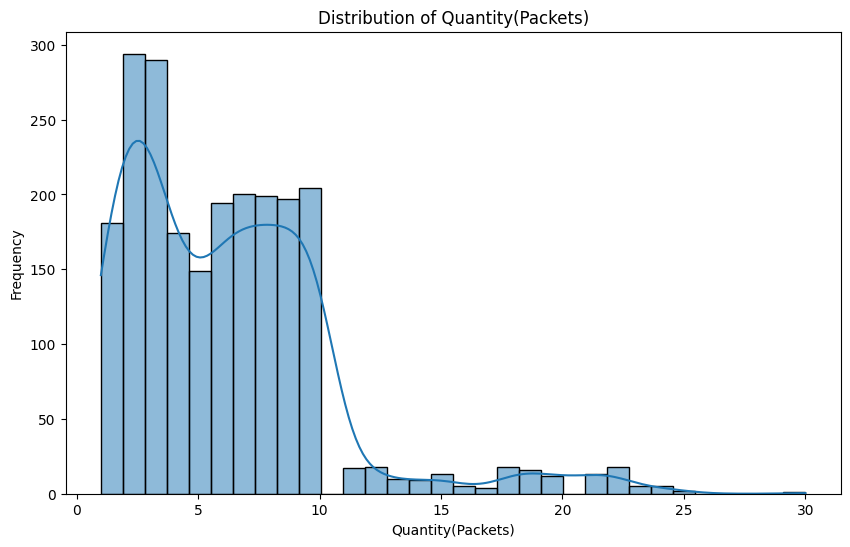

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Quantity(Packets)'], kde=True)
plt.title('Distribution of Quantity(Packets)')
plt.xlabel('Quantity(Packets)')
plt.ylabel('Frequency')
plt.show()


In [6]:
feature_columns = X.columns.tolist()


In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
#Hyperparameter tuning (optional)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [9]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [10]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 7.377062868915192
Mean Absolute Error: 2.135350321295035
R-squared: 0.6151156140994374


In [11]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


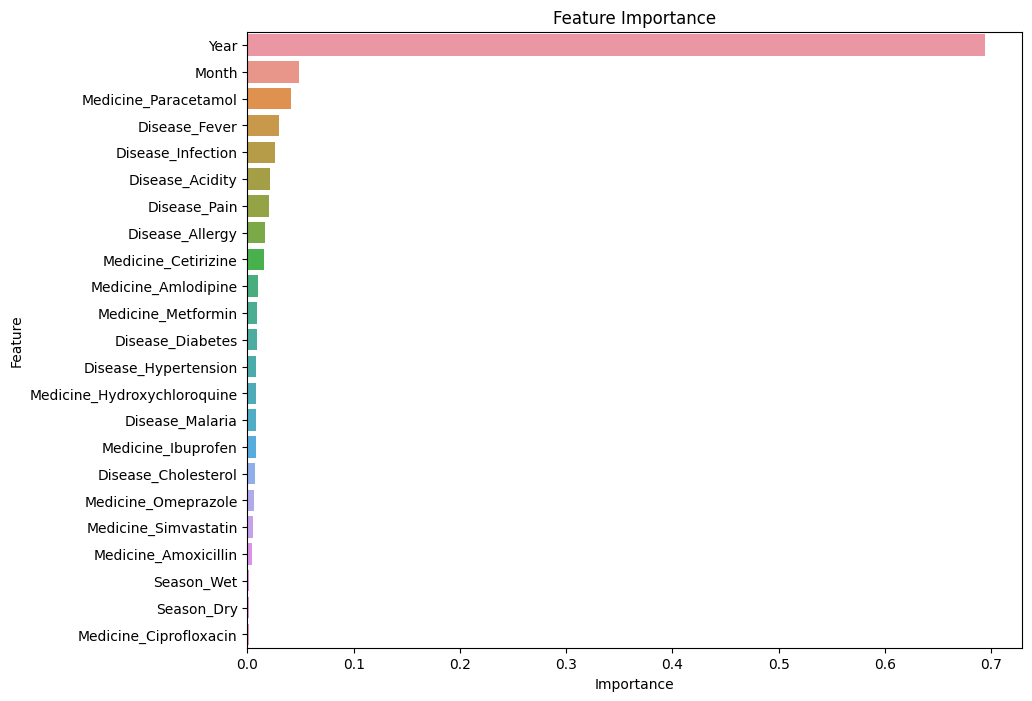

In [12]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

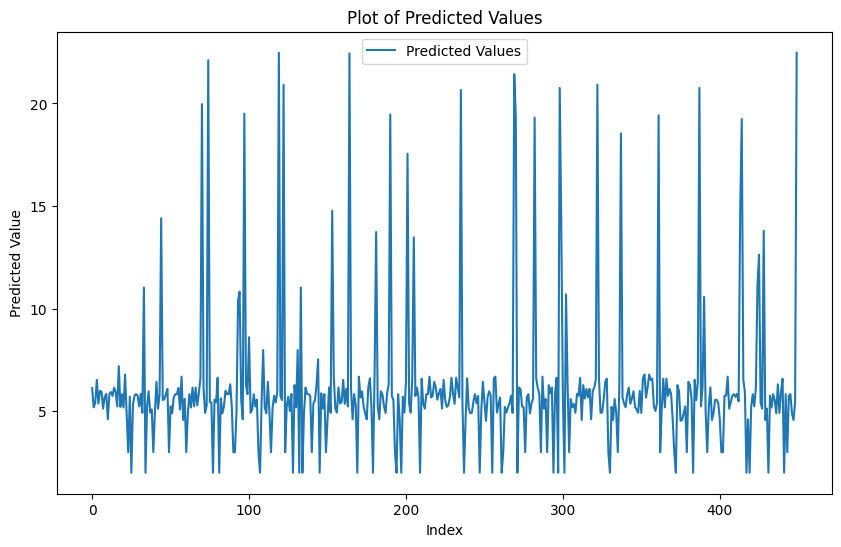

In [13]:
# Plot predicted values
plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Predicted Value')
plt.title('Plot of Predicted Values')
plt.legend()
plt.show()

In [14]:
# Save and load model
with open("model_saved.pkl", "wb") as file:
    pickle.dump(model, file)

with open("model_saved.pkl", "rb") as file:
    model_loaded = pickle.load(file)

In [15]:
# Verify loaded model predictions
loaded_predictions = model_loaded.predict(X_test)
print("Loaded Model Predictions:", loaded_predictions)

Loaded Model Predictions: [ 6.12812335  5.18817444  5.42029627  6.52402309  5.37121697  5.98831284
  5.9469535   5.12455186  5.70208173  5.84037137  4.60227845  5.84037137
  5.93365967  5.74469068  6.14834834  5.93365967  5.23183741  7.1943664
  5.208176    5.82894316  5.17836513  6.78733862  4.93368605  3.
  5.70208173  2.          5.28405322  5.75364013  5.83045383  5.75364013
  5.23183741  5.84037137  4.92019372 11.02955125  2.          5.23183741
  5.96762499  4.93368605  5.08234462  3.          4.92197056  6.42937746
  5.12455186  5.82932887 14.40215945  5.54124208  5.59174117  5.82894316
  6.0839703   3.          5.23183741  4.89819016  5.6670056   5.82894316
  5.82894316  6.12812335  5.08234462  6.68139527  4.5696356   5.60103746
  3.          4.89819016  5.83045383  5.17836513  6.15122583  5.23252524
  6.14834834  5.28405322  5.8702651   6.60490648 19.96875149  6.12812335
  4.91617736  5.28405322 22.1083057   5.43745619  5.42029627  2.
  5.56017461  5.43670439  6.63015258  2.  

In [16]:
with open('feature_columns.pkl', 'rb') as file:
    loaded_feature_columns = pickle.load(file)


In [17]:
assert len(feature_columns) == len(loaded_feature_columns), "Feature column length mismatch"
print("Feature columns loaded correctly.")

Feature columns loaded correctly.


In [18]:
# Verify feature columns
print("Training feature columns:", feature_columns)
with open('feature_columns.pkl', 'rb') as file:
    loaded_feature_columns = pickle.load(file)
print("Loaded feature columns:", loaded_feature_columns)

# Ensure feature columns are the same
assert len(feature_columns) == len(loaded_feature_columns), "Feature column length mismatch"
assert set(feature_columns) == set(loaded_feature_columns), "Feature column names mismatch"

# Verify model predictions
predictions = model.predict(X_test)
loaded_predictions = model_loaded.predict(X_test)
print("Original Model Predictions:", predictions)
print("Loaded Model Predictions:", loaded_predictions)
assert np.allclose(predictions, loaded_predictions), "Loaded model predictions do not match"


Training feature columns: ['Year', 'Month', 'Disease_Acidity', 'Disease_Allergy', 'Disease_Cholesterol', 'Disease_Diabetes', 'Disease_Fever', 'Disease_Hypertension', 'Disease_Infection', 'Disease_Malaria', 'Disease_Pain', 'Season_Dry', 'Season_Wet', 'Medicine_Amlodipine', 'Medicine_Amoxicillin', 'Medicine_Cetirizine', 'Medicine_Ciprofloxacin', 'Medicine_Hydroxychloroquine', 'Medicine_Ibuprofen', 'Medicine_Metformin', 'Medicine_Omeprazole', 'Medicine_Paracetamol', 'Medicine_Simvastatin']
Loaded feature columns: ['Year', 'Month', 'Disease_Acidity', 'Disease_Allergy', 'Disease_Cholesterol', 'Disease_Diabetes', 'Disease_Fever', 'Disease_Hypertension', 'Disease_Infection', 'Disease_Malaria', 'Disease_Pain', 'Season_Dry', 'Season_Wet', 'Medicine_Amlodipine', 'Medicine_Amoxicillin', 'Medicine_Cetirizine', 'Medicine_Ciprofloxacin', 'Medicine_Hydroxychloroquine', 'Medicine_Ibuprofen', 'Medicine_Metformin', 'Medicine_Omeprazole', 'Medicine_Paracetamol', 'Medicine_Simvastatin']
Original Model Pre